---
# <div align="center"><font color='green'> COSC 2673/2793 |  Machine Learning | Assignment 2 </font></div>
## <div align="center"> <font color='red'> Student Name:    Arya and Vaibhav                           </font></div>
## <div align="center"> <font color='red'> Student number:        4054024 and 3950267                    </font></div>
---

# Problem Statement

test

## Data Splitting, and EDA

 1) Load yur data
 2) Split your Data, explain why and how.
 3) Perform EDA and explain what each step represents. You need to perform EDA with respect to at leats one of the target values: TARGET_Capacity, or	TARGET_CaseCount.




In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load label files
main_data = pd.read_csv("Image_classification_data/data_labels_mainData.csv")
extra_data = pd.read_csv("Image_classification_data/data_labels_extraData.csv")

In [ ]:
# Set the correct path to your image folder (adjust this path!)
IMAGE_DIR = "Image_classification_data/patch_images/"  # UPDATE THIS to match your image folder

In [ ]:
#EDA:

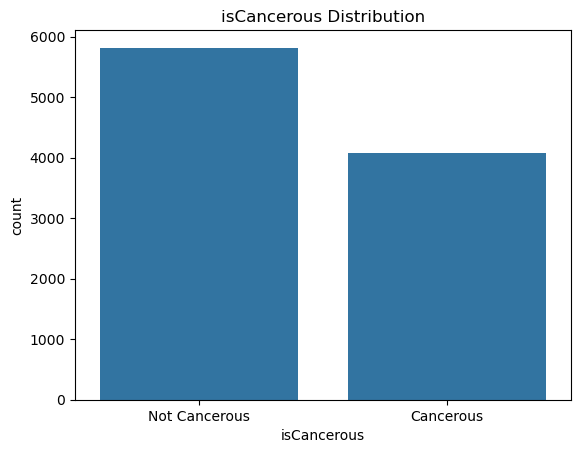

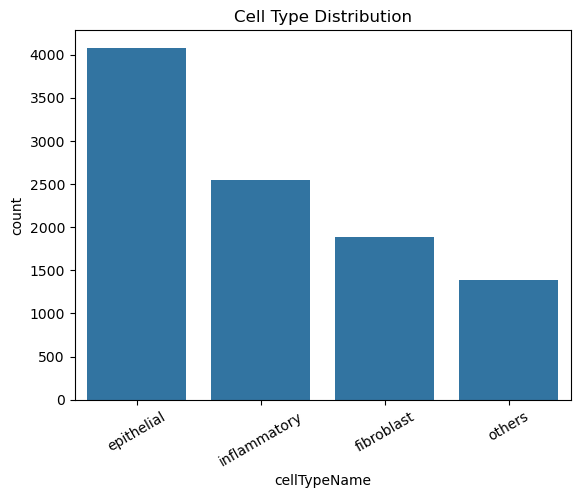

In [ ]:
# Cancerous class distribution
sns.countplot(data=main_data, x='isCancerous')
plt.title("isCancerous Distribution")
plt.xticks([0, 1], ['Not Cancerous', 'Cancerous'])
plt.show()

# Cell type distribution
sns.countplot(data=main_data, x='cellTypeName', order=main_data['cellTypeName'].value_counts().index)
plt.title("Cell Type Distribution")
plt.xticks(rotation=30)
plt.show()


In [ ]:
#Loading the images and flattening them

In [ ]:
def load_images(df, label_col, image_col='ImageName', image_dir=IMAGE_DIR):
    X, y = [], []
    skipped = 0
    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row[image_col])
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('RGB').resize((27, 27))
            X.append(np.array(img).flatten())
            y.append(row[label_col])
        else:
            print(f"Missing: {img_path}")
            skipped += 1
    print(f"Loaded: {len(X)} images | Skipped: {skipped}")
    return np.array(X), np.array(y)


In [ ]:
#Binary Classification (isCancerous)

In [ ]:
X_cancer, y_cancer = load_images(main_data, label_col='isCancerous')
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, stratify=y_cancer)

model_cancer = RandomForestClassifier(n_estimators=100, random_state=42)
model_cancer.fit(X_train_c, y_train_c)
y_pred_c = model_cancer.predict(X_test_c)

print("Cancer Classification Report")
print(classification_report(y_test_c, y_pred_c, target_names=["Not Cancerous", "Cancerous"]))

Loaded: 9896 images | Skipped: 0
Cancer Classification Report
               precision    recall  f1-score   support

Not Cancerous       0.86      0.93      0.90      1164
    Cancerous       0.89      0.78      0.83       816

     accuracy                           0.87      1980
    macro avg       0.88      0.86      0.86      1980
 weighted avg       0.87      0.87      0.87      1980



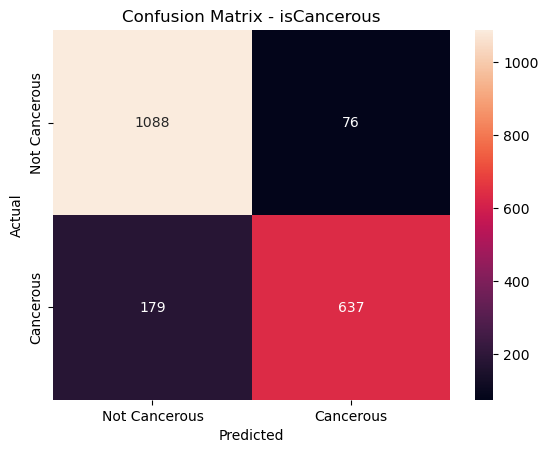

In [ ]:
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d',
            xticklabels=["Not Cancerous", "Cancerous"],
            yticklabels=["Not Cancerous", "Cancerous"])
plt.title("Confusion Matrix - isCancerous")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#Multi-Class Classification (cellTypeName)

In [ ]:
X_type, y_type = load_images(main_data, label_col='cellTypeName')

le = LabelEncoder()
y_type_enc = le.fit_transform(y_type)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_type, y_type_enc, test_size=0.2, stratify=y_type_enc)

model_type = RandomForestClassifier(n_estimators=100, random_state=42)
model_type.fit(X_train_t, y_train_t)
y_pred_t = model_type.predict(X_test_t)

print("Cell Type Classification Report")
print(classification_report(y_test_t, y_pred_t, target_names=le.classes_))

Loaded: 9896 images | Skipped: 0
Cell Type Classification Report
              precision    recall  f1-score   support

  epithelial       0.76      0.90      0.82       816
  fibroblast       0.61      0.52      0.56       378
inflammatory       0.62      0.79      0.69       509
      others       0.75      0.12      0.21       277

    accuracy                           0.69      1980
   macro avg       0.68      0.58      0.57      1980
weighted avg       0.69      0.69      0.65      1980



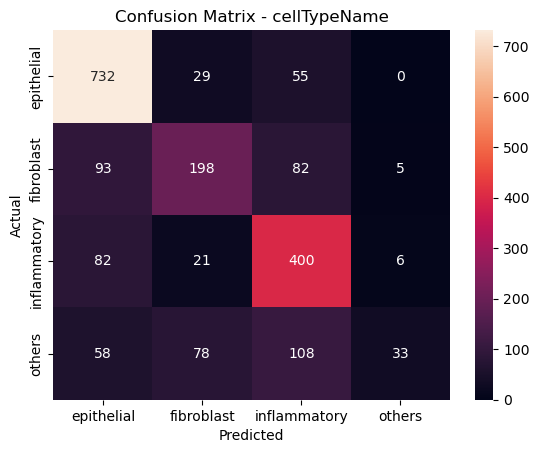

In [ ]:
sns.heatmap(confusion_matrix(y_test_t, y_pred_t), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - cellTypeName")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Use Extra Data for Semi-Supervised Boosting. You can improve isCancerous model using extra labelled data:

In [ ]:
combined_df = pd.concat([main_data[['ImageName', 'isCancerous']], extra_data[['ImageName', 'isCancerous']]])
X_combined, y_combined = load_images(combined_df, label_col='isCancerous')

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_combined, y_combined, test_size=0.2, stratify=y_combined)

Loaded: 20280 images | Skipped: 0


In [ ]:
model_boosted = RandomForestClassifier(n_estimators=100, random_state=42)
model_boosted.fit(X_train_cb, y_train_cb)
y_pred_cb = model_boosted.predict(X_test_cb)

print("Boosted Model (with Extra Data)")
print(classification_report(y_test_cb, y_pred_cb))

Boosted Model (with Extra Data)
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2642
           1       0.86      0.73      0.79      1414

    accuracy                           0.86      4056
   macro avg       0.86      0.83      0.84      4056
weighted avg       0.86      0.86      0.86      4056



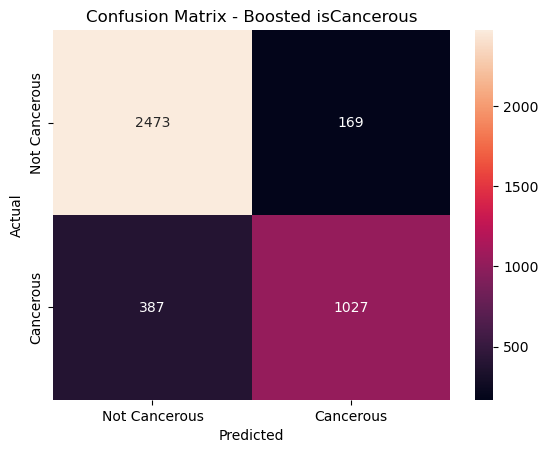

In [ ]:
sns.heatmap(confusion_matrix(y_test_cb, y_pred_cb), annot=True, fmt='d',
            xticklabels=["Not Cancerous", "Cancerous"],
            yticklabels=["Not Cancerous", "Cancerous"])
plt.title("Confusion Matrix - Boosted isCancerous")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### EDA result Analysis and deriven conclusion
Explain what you have observed from the output of your EDA


## Data Pre- Processing

Data preprocessing includes Normalisation or Standarisation, and PCA

In [ ]:
## TODO
# You will have a train and test
# then you generate train_S or Train_N for standrarised or/and normalised train, then the same thing for the test
# then you create trian_pca, and test_pca
# you will use all these sets to generate your experiments later on

# Baseline development (Linear regression and Poisson Regression)

Please note that both Linear Regression and Poisson Regression are examples of generalized linear models. Therefore, when you are asked to run linear regression for TARGET_Capacity prediction, it is the same as asking you to select a generalized linear model for your given task. Similarly for Poisson regression.

Note: You also need to balance model complexity with model performance using regularization. Explain how and why.

### Performance metrics selection

Explain the selection of performance metrics for each task in detail, including your justification.

### Parameter tuning

Explain the process of parameter tuning for each task in detail, including your justification.

Note: You also need to balance model complexity with model performance. Explain how and why.

In [ ]:
## TODO
## You need to run this code, so the output is displayed bellow


<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:**


## Polynomila regression regression only for TARGET_Capacity prediction

### performance metrics selection
Explain all the above for each task in detail, don't forget to include justification

### Parameter tunning
Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and why

In [ ]:
## TODO
## You need to run this code, so the output is displayed bellow

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:**

### You can add any other analysis you want with justification here (adding code and markdown)